In [1]:
import os
os.chdir(path='../../')
import scanpy as sc
import plotly.express as px
import matplotlib.pyplot as plt
import STForte.helper as stfhelper
from STForte.helper import mclust_R
sc.set_figure_params(dpi=120, transparent=True, dpi_save=400, frameon=False, vector_friendly=False, format="pdf")
trial_name = "trial-DLPFC-pca/151673"
plot_dir = f"./{trial_name}/plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
sc.settings.figdir = plot_dir
plt.rcParams['font.sans-serif'] = [
    'Helvetica',
    'Arial',
    'sans-serif',]
palette = px.colors.qualitative.Plotly

Global seed set to 0


In [2]:
adata = sc.read_h5ad(f"./{trial_name}/outputs/stforte.h5ad")
adata

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'spatialLIBD', 'STForte_Mask', 'mclust_STForte_COMB'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'mclust_STForte_COMB_colors', 'neighbors', 'spatial', 'spatialLIBD_colors', 'umap'
    obsm: 'STForte_ATTR', 'STForte_COMB', 'STForte_TOPO', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [3]:
adata_sp = sc.read_h5ad(f"./{trial_name}/outputs/sp.h5ad")
adata_sp

AnnData object with n_obs × n_vars = 14201 × 300
    obs: 'spot_instance'
    obsm: 'SP_ATTR_FP', 'SP_COMB', 'SP_TOPO', 'spatial'
    obsp: 'A_STForte_conn', 'A_STForte_recon'

In [4]:
# UMAP for padded data
sc.pp.neighbors(adata_sp, use_rep="SP_COMB")
sc.tl.umap(adata_sp)
# Propagate annotations
stfhelper.annotation_propagate(adata_sp, "mclust_STForte_COMB", adata, latent_embed="SP_TOPO")

In [5]:
adata_sp.obs["mclust_STForte_COMB_with_padding"] = adata_sp.obs["mclust_STForte_COMB_with_padding"].astype("category")

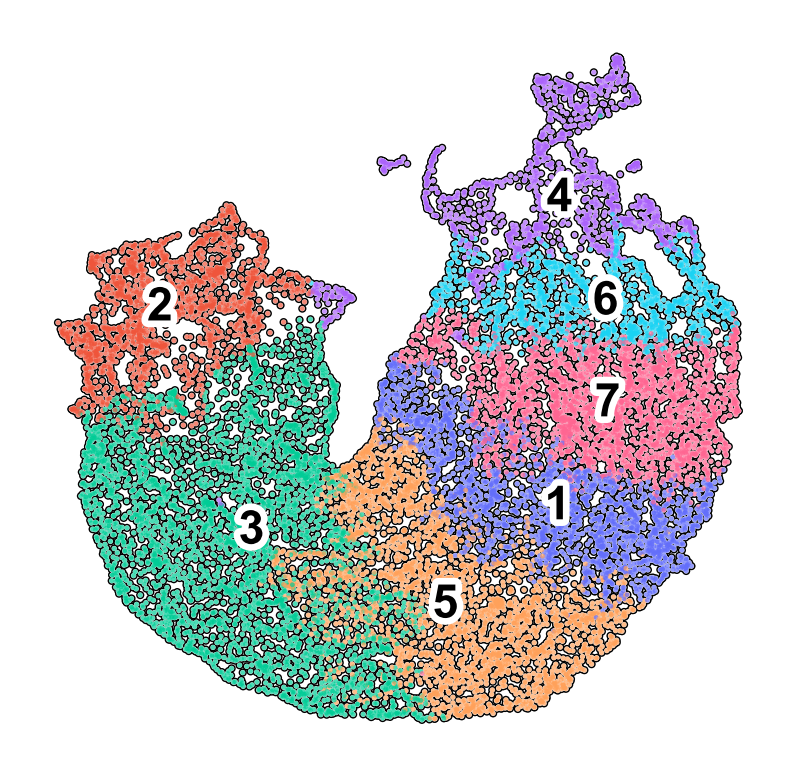

In [6]:
sc.pl.umap(adata_sp, color=["mclust_STForte_COMB_with_padding"], title="", legend_loc="on data", legend_fontoutline=4, add_outline=True, 
           frameon=False, save="_sp_pad_by_comb",palette=palette)

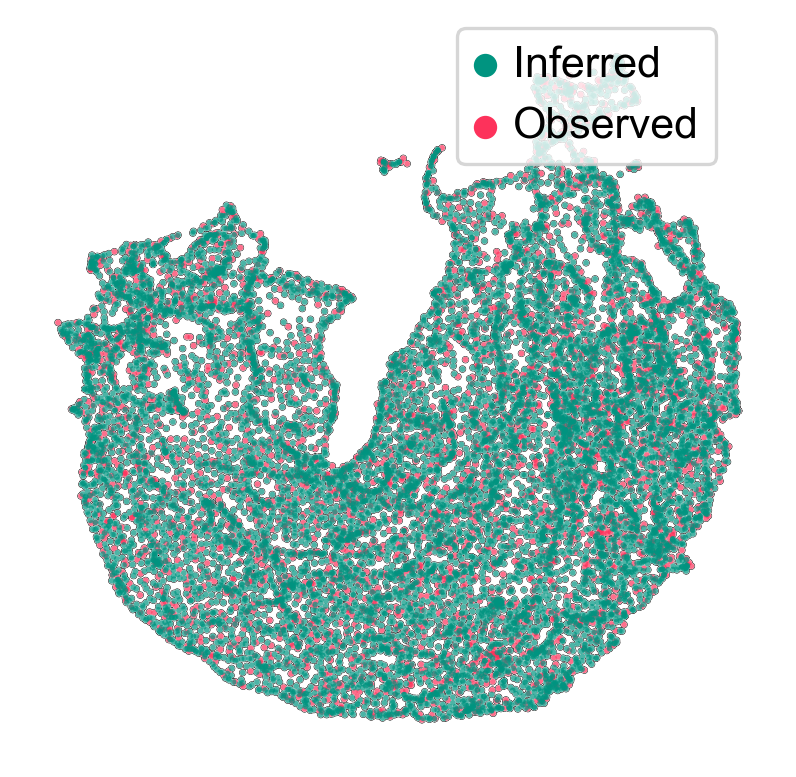

In [7]:
fig = sc.pl.umap(adata_sp, color="spot_instance", add_outline=True, outline_width=[0.08, 0.05], 
                     palette=stfhelper.pl.iwanthue_alphabet_hard[:2], size=12, title="",
                     frameon=False, show=False, return_fig=True,)
ax = fig.axes[0]
# ax.legend_.set_title('Spot Instance')
ax.legend_.set_frame_on(True)
ax.legend_.set_bbox_to_anchor((0.55,0.90))
fig.savefig(f"{plot_dir}/umap_sp_spot_instance.pdf", bbox_inches="tight", dpi=400)

In [8]:
sc.pl.spatial(adata_sp, color=['mclust_STForte_COMB_with_padding'], size=0.625, bw=True,
                  frameon=False,
                  img=adata.uns['spatial']['stomic']['images']['hires'], title="",
                  spot_size=adata.uns['spatial']['stomic']['scalefactors']['spot_diameter_fullres'], 
                  scale_factor=adata.uns['spatial']['stomic']['scalefactors']['tissue_hires_scalef'],
                  legend_fontoutline=4, 
                #   legend_loc=None, 
                  save="_sp_pad_by_comb",)

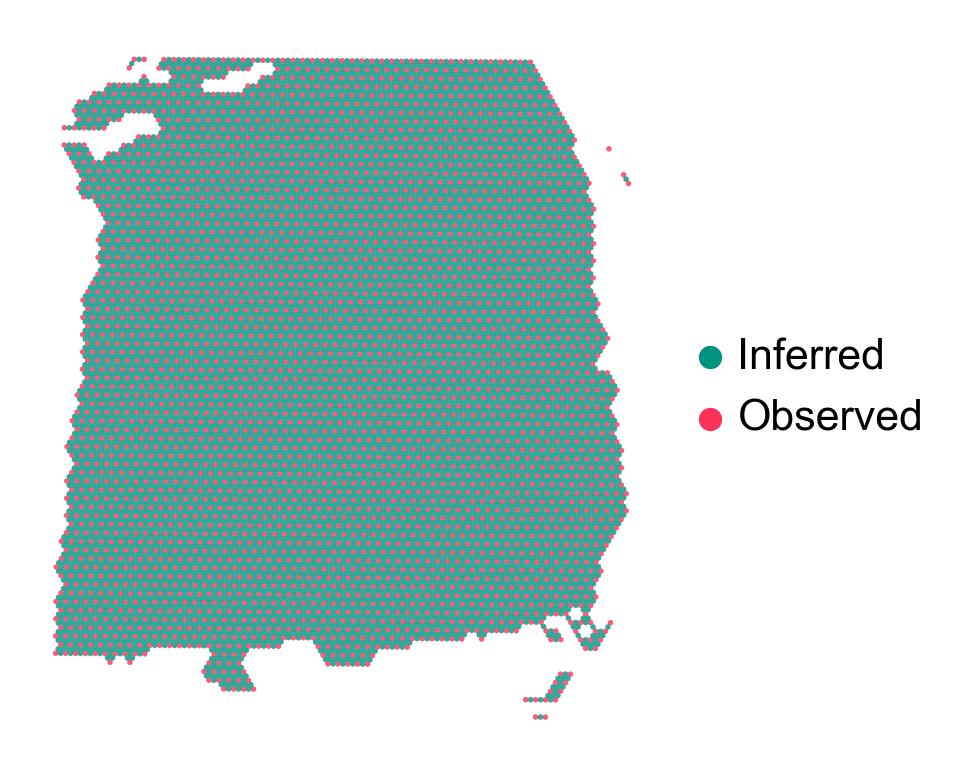

In [9]:
fig = sc.pl.spatial(adata_sp, size=0.8, alpha=0.8, bw=True, alpha_img=0.0,
                    color="spot_instance",
                    frameon=False,
                    img=adata.uns['spatial']['stomic']['images']['hires'], title=[''],
                    spot_size=adata.uns['spatial']['stomic']['scalefactors']['spot_diameter_fullres'], 
                    scale_factor=adata.uns['spatial']['stomic']['scalefactors']['tissue_hires_scalef'],
                    save="_spot_instance",
                    )

In [10]:
stfhelper.annotation_propagate(adata_sp, "spatialLIBD", adata, latent_embed="SP_COMB")

In [11]:
sc.pl.spatial(adata_sp, color=['spatialLIBD_with_padding'], 
              title=[""],
              img=adata.uns['spatial']['stomic']['images']['hires'], size=0.75,
              spot_size=adata.uns['spatial']['stomic']['scalefactors']['spot_diameter_fullres'], 
              scale_factor=adata.uns['spatial']['stomic']['scalefactors']['tissue_hires_scalef'],
              na_in_legend=False,
              palette=stfhelper.pl.rgb2hex(px.colors.qualitative.Bold),
              save="_sp_refined_ground_truth")

In [12]:
adata.write_h5ad(f"./{trial_name}/outputs/stforte.h5ad")
adata_sp.write_h5ad(f"./{trial_name}/outputs/sp.h5ad")